In [1]:
# import libraries
import pandas as pd
from ruqiya.ruqiya import clean_text
import re
import nltk
import numpy as np
#remove emojies
import demoji
#Tokenization library
from nltk.tokenize import TweetTokenizer
#Stemming library 
from nltk.stem.isri import ISRIStemmer

In [2]:
# read the dataset
delivCOMP =pd.read_excel('delivCOMP_Dataset.xlsx')
#Display the first 5 rows of the dataset
delivCOMP.head()

,Tweet,Lable,Company
0,@CareemCare @lolliklulu الحين اذا العميل اتاخر...,Negative,Careem
1,@CareemCare اتواصلت معاكم بالتطبيق اناخذ مني م...,Negative,Careem
2,@gooole99 @CareemCare انا كمان مو شغال مدري اش...,Negative,Careem
3,@CareemCare @Cz10112 @Linakh32 ترسلون هنا على ...,Negative,Careem
4,@Li1Ra @HRDF_Care @CareemCare وش السالفه ليه معلق,Negative,Careem


In [37]:
#count number of Lable of dataset
delivCOMP["Lable"].value_counts()

0    3897
1     695
2     573
3       1
Name: Lable, dtype: int64

In [3]:
#count number of company of dataset
delivCOMP["Company"].value_counts()

HungerStation    1869
Careem           1306
Jahez            1261
Mrsool           1120
ToYou             341
Shgardi            89
Nahdi              57
The Chefz          20
Ninja              12
Name: Company, dtype: int64

In [4]:
#Pre-Processing 

#clean and Normalize the text
def cleanTxt(text):
    text = re.sub(r'[A-Za-z0-9٠-٩]+', '', text) #Remove english letters,english NO.,Arabic NO. 
    text = demoji.replace(text, "")  #Remove Emojis
    return text
#Remove repeating character,punctuations,diacritics,stop words,Normalize Arabic
#for clean_text function
delivCOMP['Clean_tweet'] = delivCOMP['Tweet'].astype(str).apply(clean_text)
#for cleanTxt function
delivCOMP['Clean_tweet'] = delivCOMP['Clean_tweet'].astype(str).apply(cleanTxt)

#Remove duplication tweets
delivCOMP.drop_duplicates(subset = 'Clean_tweet', inplace = True)

#Tokenize the text 
text = TweetTokenizer()
delivCOMP['Tokeniz_tweet'] = delivCOMP['Clean_tweet'].apply(text.tokenize)
#Arabic stemmer
def stemmingText(text):  
    text = [ISRIStemmer().stem(word) for word in text]
    return text
delivCOMP["Stemming"]=delivCOMP["Tokeniz_tweet"].apply(stemmingText)

In [5]:
#show the data after processing
delivCOMP

,Tweet,Lable,Company,Clean_tweet,Tokeniz_tweet,Stemming
0,@CareemCare @lolliklulu الحين اذا العميل اتاخر...,Negative,Careem,الحين العميل اتاخر الكبتن يتغرم ويكع فلوس طي...,"[الحين, العميل, اتاخر, الكبتن, يتغرم, ويكع, فل...","[حين, عمل, تخر, كبت, غرم, يكع, فلس, طيب, عمل, ..."
1,@CareemCare اتواصلت معاكم بالتطبيق اناخذ مني م...,Negative,Careem,اتواصلت معاكم بالتطبيق اناخذ مني مبلغ كامل وا...,"[اتواصلت, معاكم, بالتطبيق, اناخذ, مني, مبلغ, ك...","[وصل, معا, طبق, نخذ, مني, بلغ, كمل, طبق, خفي, ..."
2,@gooole99 @CareemCare انا كمان مو شغال مدري اش...,Negative,Careem,كمان مو شغال مدري اشفيهم برنامج كريم,"[كمان, مو, شغال, مدري, اشفيهم, برنامج, كريم]","[كمن, مو, شغل, دري, اشف, رنمج, كرم]"
3,@CareemCare @Cz10112 @Linakh32 ترسلون هنا على ...,Negative,Careem,ترسلون العام التواصل معاك رفعنا ايميلات و...,"[ترسلون, العام, التواصل, معاك, رفعنا, ايميلات,...","[رسل, عام, وصل, عاك, رفع, يمل, تصل, يرد]"
4,@Li1Ra @HRDF_Care @CareemCare وش السالفه ليه معلق,Negative,Careem,وش السالفه ليه معلق,"[وش, السالفه, ليه, معلق]","[وش, سلف, ليه, علق]"
...,...,...,...,...,...,...
6066,@nazaha_gov_sa @JahezApp السلام عليكم و رحمة ا...,Negative,Jahez,السلام عليكم رحمه اله بركاته التطبيق يقوم بع...,"[السلام, عليكم, رحمه, اله, بركاته, التطبيق, يق...","[سلم, علي, رحم, اله, برك, طبق, يقم, عمل, نصب, ..."
6068,@JahezApp \n\nمن قبل الساعة٢ الظهر وانا اراسلك...,Negative,Jahez,\n الساعه الظهر اراسلكم التطبيق وتويتر والهاتف...,"[الساعه, الظهر, اراسلكم, التطبيق, وتويتر, واله...","[سعه, ظهر, رسل, طبق, يتر, هتف, قبل, شوي, يمل, ..."
6069,@JahezApp السلام عليكم عندي طلب لم يظهر لدي بش...,Negative,Jahez,السلام عليكم عندي طلب يظهر بشاشه التطبيق ساعت...,"[السلام, عليكم, عندي, طلب, يظهر, بشاشه, التطبي...","[سلم, علي, عند, طلب, ظهر, بشش, طبق, ساع, ظهر, ..."
6072,@mazameezksa @JahezApp لي نص ساعه طالبه والى ا...,Negative,Jahez,نص ساعه طالبه يطلع التطبيق مافي مندوب ياخذ...,"[نص, ساعه, طالبه, يطلع, التطبيق, مافي, مندوب, ...","[نص, سعه, طلب, طلع, طبق, افي, ندب, يخذ, طلب, ب..."


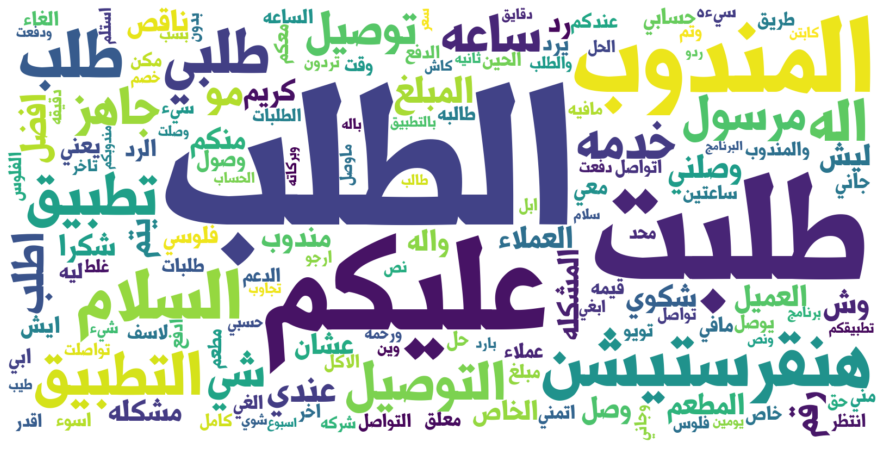

In [6]:
# display the most frequent words
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
from nltk.corpus import stopwords
from itertools import islice
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = " ".join(line for line in delivCOMP['Clean_tweet'])
stop_ar = stopwords.words('arabic') 
top_words = {}
words = text.split()
for w in words:
    if w in stop_ar:
        continue
    else:
        if w not in top_words:
            top_words[w] = 1
        else:
            top_words[w] +=1

# Sort the dictionary of the most frequent words
top_words = {k: v for k, v in sorted(top_words.items(), key=lambda item: item[1], reverse = True)}

# select the first 150 most frequent words
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))
for_wc = take(150, top_words.items())

# you need to reshape your words to be shown properly and turn the result into a dictionary
dic_data = {}
for t in for_wc:
    r = arabic_reshaper.reshape(t[0]) # connect Arabic letters
    bdt = get_display(r) # right to left
    dic_data[bdt] = t[1] 

# Plot
wc = WordCloud(background_color="white", width=1600, height=800,max_words=400 ,
font_path='Shoroq-Font.ttf').generate_from_frequencies(dic_data)
plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
all_words = [word for tokens in delivCOMP["Tokeniz_tweet"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in delivCOMP["Tokeniz_tweet"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

60880 words total, with a vocabulary size of 12122
Max sentence length is 44


In [8]:
from collections import Counter
#wordcloud
counter = Counter(all_words)
counter.most_common(25)

[('الطلب', 1808),
 ('طلبت', 905),
 ('عليكم', 688),
 ('المندوب', 684),
 ('هنقرستيشن', 667),
 ('السلام', 554),
 ('طلب', 518),
 ('طلبي', 442),
 ('التطبيق', 425),
 ('تطبيق', 412),
 ('اله', 395),
 ('التوصيل', 390),
 ('خدمه', 379),
 ('ساعه', 369),
 ('جاهز', 361),
 ('مرسول', 327),
 ('شي', 294),
 ('توصيل', 289),
 ('اطلب', 266),
 ('مو', 259),
 ('المبلغ', 257),
 ('عندي', 254),
 ('رقم', 250),
 ('افضل', 238),
 ('وصلني', 229)]

In [9]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

In [10]:
y=delivCOMP['Lable']
y.value_counts()

Negative    3897
Neutral      695
Positive     573
Name: Lable, dtype: int64

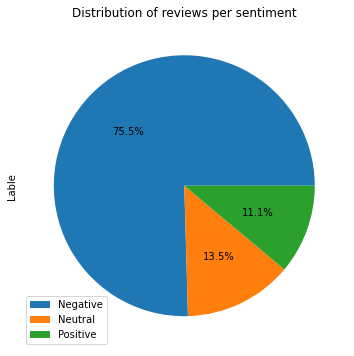

In [11]:
#Ratio of Data Diversity
delivCOMP['Lable'].value_counts().plot.pie(figsize=(6,6),title="Distribution of reviews per sentiment",
labels=['','','',''],autopct='%1.1f%%' )
labels=["Negative","Neutral","Positive"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')

In [12]:
 # 0 = neutral  , 1 = positive  , -1 = negative 
label_mapping = {"Positive": 1, "Negative":-1, "Neutral":0}
 delivCOMP["Lable"] = delivCOMP["Lable"].map(label_mapping)
delivCOMP.head()

,Tweet,Lable,Company,Clean_tweet,Tokeniz_tweet,Stemming
0,@CareemCare @lolliklulu الحين اذا العميل اتاخر...,-1.0,Careem,الحين العميل اتاخر الكبتن يتغرم ويكع فلوس طي...,"[الحين, العميل, اتاخر, الكبتن, يتغرم, ويكع, فل...","[حين, عمل, تخر, كبت, غرم, يكع, فلس, طيب, عمل, ..."
1,@CareemCare اتواصلت معاكم بالتطبيق اناخذ مني م...,-1.0,Careem,اتواصلت معاكم بالتطبيق اناخذ مني مبلغ كامل وا...,"[اتواصلت, معاكم, بالتطبيق, اناخذ, مني, مبلغ, ك...","[وصل, معا, طبق, نخذ, مني, بلغ, كمل, طبق, خفي, ..."
2,@gooole99 @CareemCare انا كمان مو شغال مدري اش...,-1.0,Careem,كمان مو شغال مدري اشفيهم برنامج كريم,"[كمان, مو, شغال, مدري, اشفيهم, برنامج, كريم]","[كمن, مو, شغل, دري, اشف, رنمج, كرم]"
3,@CareemCare @Cz10112 @Linakh32 ترسلون هنا على ...,-1.0,Careem,ترسلون العام التواصل معاك رفعنا ايميلات و...,"[ترسلون, العام, التواصل, معاك, رفعنا, ايميلات,...","[رسل, عام, وصل, عاك, رفع, يمل, تصل, يرد]"
4,@Li1Ra @HRDF_Care @CareemCare وش السالفه ليه معلق,-1.0,Careem,وش السالفه ليه معلق,"[وش, السالفه, ليه, معلق]","[وش, سلف, ليه, علق]"


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features =10000)
unigramdataGet= word_vectorizer.fit_transform(delivCOMP['Tokeniz_tweet'].astype('str'))
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer.get_feature_names()
unigramdata_features=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata_features[unigramdata_features>0] = 1
unigramdata_features.head()

,u0001f979,u0001fae1,u0001fae3,u0001faf6,u200d,u200f,اءتمانيه,ابا,اباطه,ابحث,...,يوقفني,يولد,يومك,يومه,يومها,يومي,يوميا,يومين,يونسني,يوه
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn import preprocessing
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(delivCOMP['Lable'])
delivCOMP['Lable'] = encpro

In [15]:
y=delivCOMP['Lable']
X=unigramdata_features

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [17]:
y_test.value_counts()

0    780
1    133
2    121
Name: Lable, dtype: int64

In [18]:
y_train.value_counts()

0    3117
1     562
2     452
3       1
Name: Lable, dtype: int64

In [19]:
print("Train Size: ", len(X_train))
print("Test Size:  ", len(X_test))

Train Size:  4132
Test Size:   1034


In [20]:
#ensemble model python code

In [21]:
from sklearn.naive_bayes import GaussianNB
##1-Naive Bayes Algorithm
nb=GaussianNB()
nb= nb.fit(X_train , y_train)
nb

GaussianNB()

In [22]:
y_pred = nb.predict(X_test)
nb_1=nb.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(nb.score(X_test, y_test)))

Accuracy= 0.764


In [23]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
target_names = ['-1', '0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          -1       0.84      0.88      0.86       780
           0       0.39      0.29      0.33       133
           1       0.54      0.56      0.55       121

    accuracy                           0.76      1034
   macro avg       0.59      0.57      0.58      1034
weighted avg       0.75      0.76      0.76      1034



In [24]:
from sklearn.linear_model import RidgeClassifier
#2-Ridge Classifier Algorithm
RC= RidgeClassifier()
RC= RC.fit(X_train , y_train)
RC

RidgeClassifier()

In [25]:
y_pred = RC.predict(X_test)
rc_1=RC.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(RC.score(X_test, y_test)))

Accuracy= 0.814


In [26]:
target_names = ['-1', '0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          -1       0.87      0.91      0.89       780
           0       0.45      0.38      0.41       133
           1       0.79      0.70      0.75       121

    accuracy                           0.81      1034
   macro avg       0.70      0.66      0.68      1034
weighted avg       0.81      0.81      0.81      1034



In [27]:
from sklearn.linear_model import LogisticRegression
#3-Logistic Regression Algorithm 
LR= LogisticRegression(penalty = 'l2', C = 1)
LR= LR.fit(X_train , y_train)
LR

C:\Users\AMC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [28]:
y_pred = LR.predict(X_test)
lr_1=LR.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy= 0.841


In [29]:
target_names = ['-1', '0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          -1       0.87      0.94      0.91       780
           0       0.58      0.39      0.47       133
           1       0.81      0.68      0.74       121

    accuracy                           0.84      1034
   macro avg       0.76      0.67      0.70      1034
weighted avg       0.83      0.84      0.83      1034



In [30]:
from sklearn.ensemble import RandomForestClassifier
#4-Random Forest Algorithm
clf=RandomForestClassifier(n_estimators=10)
clf= clf.fit(X_train , y_train)
clf

RandomForestClassifier(n_estimators=10)

In [31]:
y_pred = clf.predict(X_test)
clf_1=clf.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy= 0.820


In [32]:
target_names = ['-1', '0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          -1       0.86      0.93      0.90       780
           0       0.51      0.33      0.40       133
           1       0.74      0.64      0.69       121

    accuracy                           0.82      1034
   macro avg       0.70      0.64      0.66      1034
weighted avg       0.80      0.82      0.81      1034



In [33]:
from sklearn import svm
#5-Support Vector Machines
svm=svm.SVC()
nb= svm.fit(X_train , y_train)
svm

SVC()

In [34]:
y_pred = svm.predict(X_test)
svm1=svm.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(svm.score(X_test, y_test)))

Accuracy= 0.826


In [35]:
target_names = ['-1', '0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          -1       0.83      0.99      0.90       780
           0       0.92      0.18      0.30       133
           1       0.80      0.50      0.62       121

    accuracy                           0.83      1034
   macro avg       0.85      0.56      0.61      1034
weighted avg       0.84      0.83      0.79      1034



In [36]:
from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("Comparison of all algorithms on F1 score")
x.field_names = ["Model Name", "F1"]

x.add_row(["Naive Bayes Algorithm", round(nb_1,2)])
x.add_row(["Ridge Classifier Algorithm",  round(rc_1,2)])
x.add_row(["Logistic Regression Algorithm", round(lr_1,2)])
x.add_row(["Random Forest Algorithm", round(clf_1,2)])
x.add_row(["Support Vector Machines", round(svm1,2)])

print(x)
print('\n')



Comparison of all algorithms on F1 score
+-------------------------------+------+
|           Model Name          |  F1  |
+-------------------------------+------+
|     Naive Bayes Algorithm     | 0.76 |
|   Ridge Classifier Algorithm  | 0.81 |
| Logistic Regression Algorithm | 0.84 |
|    Random Forest Algorithm    | 0.82 |
|    Support Vector Machines    | 0.83 |
+-------------------------------+------+


